In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
import pickle

In [27]:
df = pd.read_csv("diabetes_012_health_indicators_BRFSS2021.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236378 entries, 0 to 236377
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          236378 non-null  float64
 1   HighBP                236378 non-null  int64  
 2   HighChol              236378 non-null  float64
 3   CholCheck             236378 non-null  int64  
 4   BMI                   236378 non-null  float64
 5   Smoker                236378 non-null  float64
 6   Stroke                236378 non-null  float64
 7   HeartDiseaseorAttack  236378 non-null  float64
 8   PhysActivity          236378 non-null  int64  
 9   Fruits                236378 non-null  int64  
 10  Veggies               236378 non-null  int64  
 11  HvyAlcoholConsump     236378 non-null  int64  
 12  AnyHealthcare         236378 non-null  int64  
 13  NoDocbcCost           236378 non-null  float64
 14  GenHlth               236378 non-null  float64
 15  

In [29]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,...,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000,236378.000000
mean,0.307791,0.418558,0.402059,0.963347,28.953579,0.411997,0.038900,0.086548,0.779231,0.621259,...,0.962573,0.063737,2.480717,3.937710,3.751297,0.153948,0.477824,7.863930,5.139099,6.927451
std,0.705037,0.493324,0.490315,0.187909,6.552055,0.492196,0.193356,0.281172,0.414766,0.485074,...,0.189807,0.244284,1.029134,7.886506,8.245907,0.360900,0.499509,3.236997,0.946185,2.375450
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,5.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,4.000000,2.000000,0.000000,1.000000,10.000000,6.000000,9.000000
max,2.000000,1.000000,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,11.000000


In [30]:
df['Diabetes_012'] = df['Diabetes_012'].astype(int)

In [31]:
df['Age'] = df['Age'].astype(int)

In [32]:
df.drop("Education", axis=1)
df.drop("Income", axis=1)
df.drop("DiffWalk", axis=1)
df.drop("HvyAlcoholConsump", axis=1)
df.drop("Stroke", axis=1)
df.drop("BMI", axis=1)

,Diabetes_012,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,0,1.0,1,1.0,0.0,0.0,0,1,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,2,1,0.0,1,0.0,0.0,1.0,0,1,0,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,2,1,1.0,1,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,2,0,1.0,1,0.0,1.0,1.0,1,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0,0,0.0,1,1.0,0.0,0.0,0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236373,2,1,1.0,1,0.0,0.0,0.0,1,1,1,...,1,0.0,4.0,0.0,0.0,0.0,1,10,2.0,3.0
236374,0,1,0.0,1,1.0,0.0,0.0,1,1,1,...,0,1.0,2.0,20.0,0.0,0.0,0,3,4.0,5.0
236375,0,0,1.0,1,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,7,6.0,10.0
236376,0,1,0.0,1,0.0,0.0,0.0,1,1,1,...,1,0.0,2.0,0.0,0.0,0.0,1,10,4.0,6.0


In [33]:
df.duplicated().sum()

12828

In [34]:
df = df.drop_duplicates()

In [35]:
df.duplicated().sum()

0

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 20296 (\N{CJK UNIFIED IDEOGRAPH-4F48}) missing from current font.



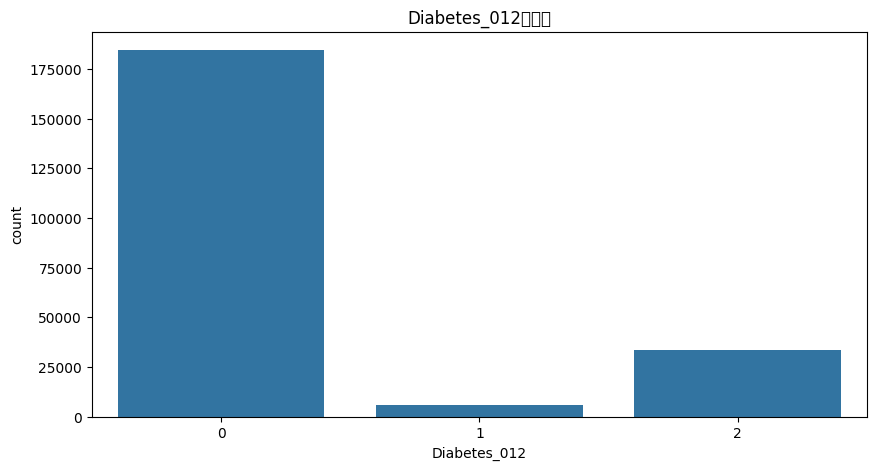

In [36]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Diabetes_012'])
plt.title('Diabetes_012的分佈')
plt.show()

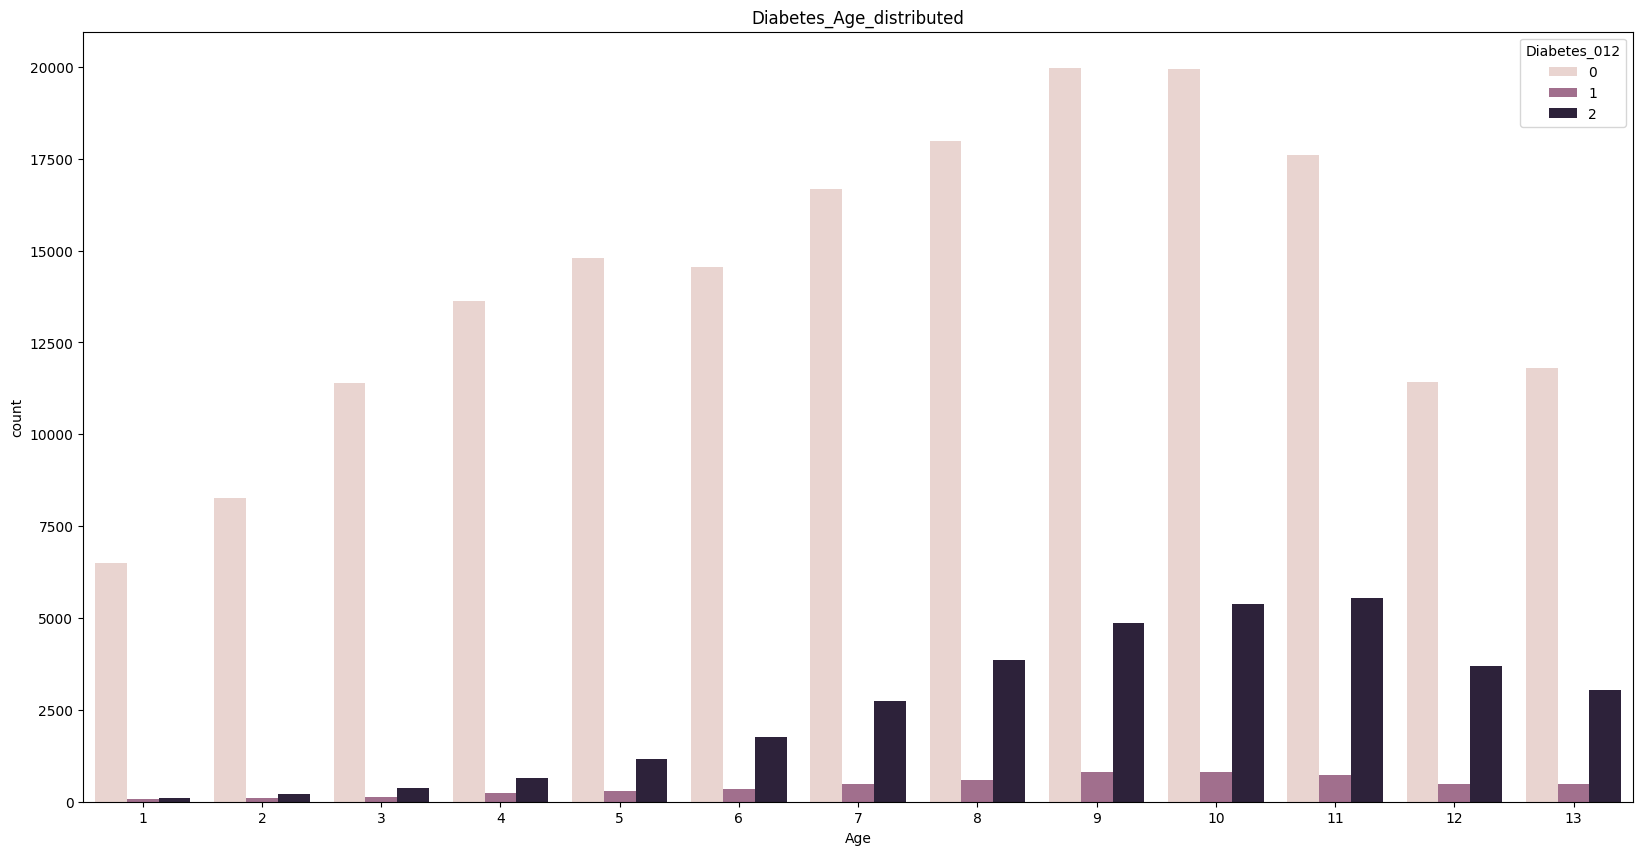

In [37]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Age'], hue=df['Diabetes_012'])
plt.title('Diabetes_Age_distributed')
plt.show()

In [38]:
import plotly.express as px
plt.figure(figsize=(20, 10))
fig = px.histogram(data_frame=df, x="HeartDiseaseorAttack", title="HeartDiseaseorAttack distributed")
fig.update_traces(marker={"color": "blue", "opacity": 0.5, "line": {"width": 4, "color": "black"}})
fig.show()

<Figure size 2000x1000 with 0 Axes>

In [39]:
X = df.drop("Diabetes_012", axis=1)
Y = df["Diabetes_012"]

In [40]:
from imblearn.over_sampling import RandomOverSampler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [41]:
Logistic_Regression = LogisticRegression()

In [42]:
Logistic_Regression.fit(X_resampled, y_resampled)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [43]:
Logistic_predictions = Logistic_Regression.predict(X_test)

In [44]:
Logistic_accuracy = accuracy_score(y_test, Logistic_predictions)

In [45]:
cm = confusion_matrix(y_test, Logistic_predictions)
print(cm)

[[35102  9310 10952]
 [  534   510   681]
 [ 1899  2142  5935]]


In [46]:
print(classification_report(y_test, Logistic_predictions))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76     55364
           1       0.04      0.30      0.07      1725
           2       0.34      0.59      0.43      9976

    accuracy                           0.62     67065
   macro avg       0.44      0.51      0.42     67065
weighted avg       0.82      0.62      0.69     67065



In [47]:
Logistic_accuracy

0.6195034667859539

In [48]:
print(classification_report(y_test, Logistic_predictions))

              precision    recall  f1-score   support

           0       0.94      0.63      0.76     55364
           1       0.04      0.30      0.07      1725
           2       0.34      0.59      0.43      9976

    accuracy                           0.62     67065
   macro avg       0.44      0.51      0.42     67065
weighted avg       0.82      0.62      0.69     67065



In [49]:
cm = confusion_matrix(y_test, Logistic_predictions)
print(cm)

[[35102  9310 10952]
 [  534   510   681]
 [ 1899  2142  5935]]


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 28151 (\N{CJK UNIFIED IDEOGRAPH-6DF7}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

Glyph 28102 (\N{CJK UNIFIED IDEOGRAPH-6DC6}) missing from current font.

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWar

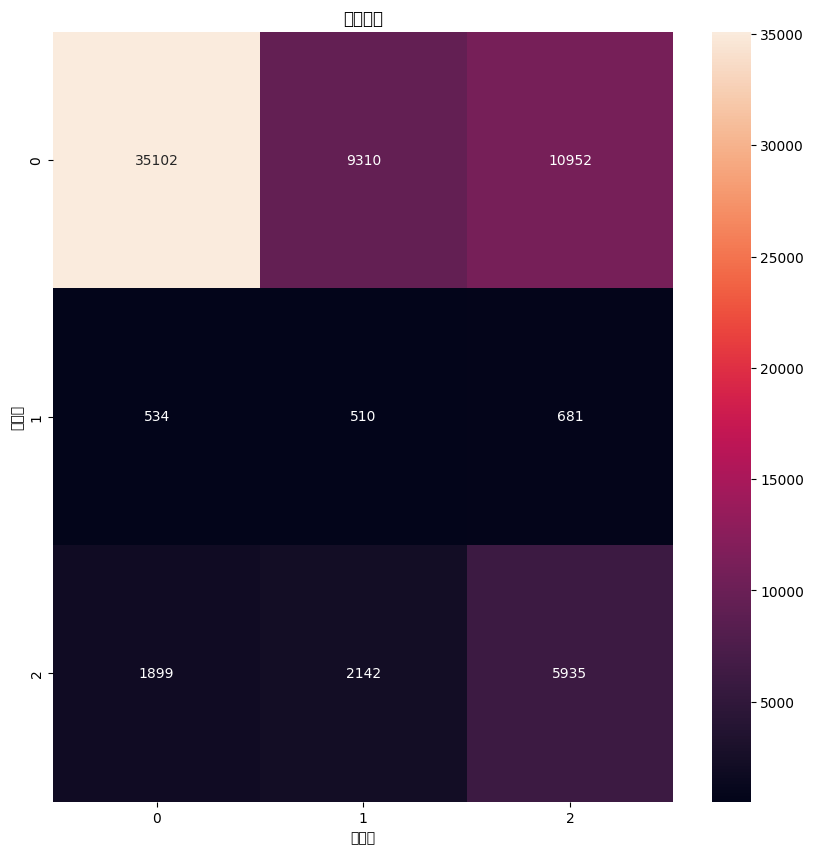

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('預測值')
plt.ylabel('實際值')
plt.title('混淆矩陣')
plt.show()

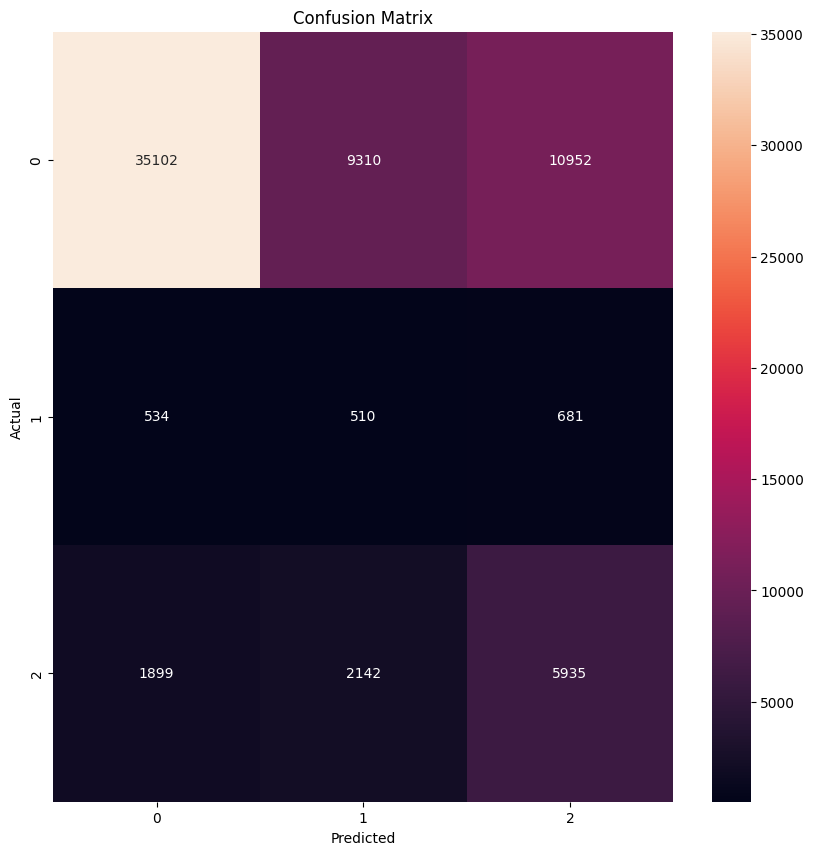

In [51]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [52]:
pickle.dump(Logistic_Regression, open("my_model.pkl", "wb"))

In [53]:
model = pickle.load(open("my_model.pkl", "rb"))

In [54]:
model.predict(X_test.iloc[5:80])

array([2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 1, 1, 2, 2, 2, 0, 0])